In [5]:
%matplotlib inline
%pylab inline


#Modules.
from Classes import *

Populating the interactive namespace from numpy and matplotlib


In [6]:
#Plot settings.
rc('font', size = 18)
rc('lines', linewidth = 2)

myColors = plt.cm.Spectral(concatenate([arange(0,0.35,1/12.),arange(0.6,1.05,1/12.)]))

In [8]:
#Read data from SweepVc.

runsDeterministic = fun.readData('data/sweepVc-Deterministics')
runsStochastic = fun.readData('data/sweepVc-Stochastics')

sweepVcDet = arange(0.000001,0.41,0.01)
sweepVc = sort(runsStochastic.keys())

In [9]:
#Functions.

def giveBoundaries(y):
    #Sort runs, looping over Vc's.
    y = [sorted(x) for x in y]
    boundaries = transpose([(x[24],x[499],x[975]) for x in y])
    #boundaries = transpose([(x[0],x[1],x[2]) for x in y])
    return boundaries[0], boundaries[1], boundaries[2]

def plotStochastic(ax,y,color,colorBackground,credibility = True):
    lower, median, upper = giveBoundaries(y)
    ax.plot(sweepVc, median, linewidth=2,color=color, zorder = 1)
    if credibility:
        ax.plot(sweepVc,lower, sweepVc, upper, linewidth=1,color=color, zorder = 0)
        ax.fill_between(sweepVc, lower, upper, color=colorBackground, zorder = 0)


In [11]:
#Give estimates at Vc=0.25 to mention in text. For unvaccinated and vaccinated children respectively.
index = 25


boundaries = giveBoundaries([[run.meanFinalsize['s'][0] for run in runsStochastic[Vc]] for Vc in sweepVc])

print sweepVc[index]
print boundaries[0][index], boundaries[1][index], boundaries[2][index]


boundaries = giveBoundaries([[run.meanFinalsize['p'][0] for run in runsStochastic[Vc]] for Vc in sweepVc])

print sweepVc[index]
print boundaries[0][index], boundaries[1][index], boundaries[2][index]

0.250001
0.0183829337343 0.0282434806991 0.0408477867266
0.250001
0.00968791597565 0.0149254522467 0.0216113333838


In [12]:
#And the deterministic estimates.

print sweepVc[index]
print runsDeterministic[sweepVc[index]].meanFinalsize['s'][0]

print sweepVc[index]
print runsDeterministic[sweepVc[index]].meanFinalsize['p'][0]


0.250001
0.00547280409333
0.250001
0.00274027593688


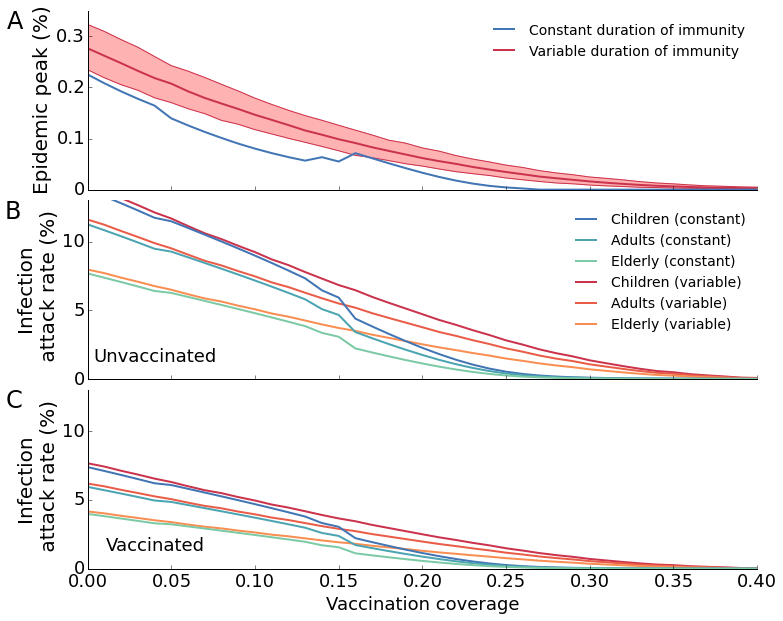

In [39]:
fig = plt.figure(figsize=(12,10))

#--------------------------------------------------------------------------
ax = fig.add_subplot(311)
text(-0.12, 0.9,'A',transform = ax.transAxes, fontsize = 24)

meanPeakDet = [runsDeterministic[Vc].meanPeak for Vc in sweepVc]
ax.plot(sweepVcDet,meanPeakDet, color = myColors[9])

meanPeak = [[run.meanPeak for run in runsStochastic[Vc]] for Vc in sweepVc]
plotStochastic(ax,meanPeak,myColors[1],[255/255.,178/255.,178/255.])

ax.set_xlim([0,0.4])
ax.set_xticklabels([])

ax.set_ylim([0,0.0035])
ax.set_yticks([0,0.001,0.002,0.003])
ax.set_yticklabels([0,0.1,0.2,0.3])

ax.set_ylabel('Epidemic peak (%)', fontsize = 20)

#Dummy plot legend.
ax.plot(-1,-1, linewidth=2, color=myColors[9],label = 'Constant duration of immunity')
ax.plot(-1,-1, linewidth=2, color=myColors[1],label = 'Variable duration of immunity')
ax.legend(fontsize = 14, frameon = False)

fun.removeFrame(ax)

#--------------------------------------------------------------------------
ax = fig.add_subplot(312)
text(-0.12, 0.9,'B',transform = ax.transAxes, fontsize = 24)
text(0.1,0.1,'Unvaccinated',transform = ax.transAxes, ha = 'center')


meanFinalDet = [runsDeterministic[Vc].meanFinalsize['s'][0] for Vc in sweepVc]
ax.plot(sweepVc,meanFinalDet, color=myColors[9])

meanFinalDet = [runsDeterministic[Vc].meanFinalsize['s'][1] for Vc in sweepVc]
ax.plot(sweepVc,meanFinalDet, color=myColors[8])

meanFinalDet = [runsDeterministic[Vc].meanFinalsize['s'][2] for Vc in sweepVc]
ax.plot(sweepVc,meanFinalDet, color=myColors[7])



meanFinal = [[run.meanFinalsize['s'][0] for run in runsStochastic[Vc]] for Vc in sweepVc]
plotStochastic(ax,meanFinal,myColors[1],[255/255.,178/255.,178/255.], credibility = False)

meanFinal = [[run.meanFinalsize['s'][1] for run in runsStochastic[Vc]] for Vc in sweepVc]
plotStochastic(ax,meanFinal,myColors[2],[252/255.,220/255.,202/255.], credibility = False)

meanFinal = [[run.meanFinalsize['s'][2] for run in runsStochastic[Vc]] for Vc in sweepVc]
plotStochastic(ax,meanFinal,myColors[3],[252/255.,220/255.,202/255.], credibility = False)



ax.set_xlim([0,0.4])
ax.set_xticklabels([])

ax.set_ylim([0,0.13])
ax.set_yticks([0,0.05,0.1])
ax.set_yticklabels(['0','5','10'])

ax.set_ylabel('Infection\n attack rate (%)', fontsize = 20)

#Dummy plot legend.
ax.plot(-1,-1, linewidth=2, color=myColors[9],label = 'Children (constant)')
ax.plot(-1, -1, linewidth=2,color=myColors[8],label = 'Adults (constant)')
ax.plot(-1, -1, linewidth=2,color=myColors[7],label = 'Elderly (constant)')

ax.plot(-1,-1, linewidth=2, color=myColors[1],label = 'Children (variable)')
ax.plot(-1,-1, linewidth=2, color=myColors[2],label = 'Adults (variable)')
ax.plot(-1, -1, linewidth=2,color=myColors[3],label = 'Elderly (variable)')
ax.legend(fontsize = 14, frameon = False)

fun.removeFrame(ax)



#--------------------------------------------------------------------------
ax = fig.add_subplot(313)
text(-0.12, 0.9,'C',transform = ax.transAxes, fontsize = 24)
text(0.1,0.1,'Vaccinated',transform = ax.transAxes, ha = 'center')


meanFinalDet = [runsDeterministic[Vc].meanFinalsize['p'][0] for Vc in sweepVc]
ax.plot(sweepVc,meanFinalDet, color=myColors[9])

meanFinalDet = [runsDeterministic[Vc].meanFinalsize['p'][1] for Vc in sweepVc]
ax.plot(sweepVc,meanFinalDet, color=myColors[8])

meanFinalDet = [runsDeterministic[Vc].meanFinalsize['p'][2] for Vc in sweepVc]
ax.plot(sweepVc,meanFinalDet, color=myColors[7])



meanFinal = [[run.meanFinalsize['p'][0] for run in runsStochastic[Vc]] for Vc in sweepVc]
plotStochastic(ax,meanFinal,myColors[1],[255/255.,178/255.,178/255.], credibility = False)

meanFinal = [[run.meanFinalsize['p'][1] for run in runsStochastic[Vc]] for Vc in sweepVc]
plotStochastic(ax,meanFinal,myColors[2],[252/255.,220/255.,202/255.], credibility = False)

meanFinal = [[run.meanFinalsize['p'][2] for run in runsStochastic[Vc]] for Vc in sweepVc]
plotStochastic(ax,meanFinal,myColors[3],[252/255.,220/255.,202/255.], credibility = False)



ax.set_xlim([0,0.4])
ax.set_ylim([0,0.13])
ax.set_yticks([0,0.05,0.1])
ax.set_yticklabels(['0','5','10'])

ax.set_xlabel('Vaccination coverage')
ax.set_ylabel('Infection\n attack rate (%)', fontsize = 20)


fun.removeFrame(ax)

#--------------------------------------------------------------------------

subplots_adjust(hspace = 0.06)

show()

#Save figure.
if True:
    fig.savefig('figures/sweepVcFull.eps')
    fig.savefig('figures/sweepVcFull.png')


In [13]:
#Periodicity.

[(Vc,set([round(x,6) for x in runsDeterministic[Vc].finalsize['s'][:,0]])) for Vc in sweepVc]

meanFinalDetMax = [min([round(x,6) for x in runsDeterministic[Vc].finalsize['s'][:,0]]) for Vc in sweepVc]